<a href="https://colab.research.google.com/github/OviedoMarco/DataScience/blob/MENU/Time_Series_(Primera_Parte).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelado de series de tiempo

## Clasificación de Modelos ARMA

### Data (lynx)

Modelando series de tiempo estacionarias, considerando datos ya estacionarios.

In [4]:
install.packages("seasonal")
install.packages("fpp2")
install.packages("tseries")
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [ ]:
# Carga de librerias
library(tidyverse)
library(seasonal) 
library(fpp2)
library(tseries)
library(ggplot2)
library(dplyr)
library(plotly)

In [6]:
data("lynx") # Cargamos mi base de datos

time(lynx) # tiempo de la serie

start(lynx) # inicio de la serie

end(lynx) # Fin de la serie

A Time Series:
  [1] 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835
 [16] 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849 1850
 [31] 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865
 [46] 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880
 [61] 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895
 [76] 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910
 [91] 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925
[106] 1926 1927 1928 1929 1930 1931 1932 1933 1934

[1] 1821    1

[1] 1934    1

Descripción de mis datos:

Números anuales de trampas de lince para 1821-1934 en Canadá. Tomado de Brockwell & Davis (1991), esta parece ser la serie considerada por Campbell & Walker (1977).



*   Serie con temporalidad anual
*   **Inicio:** 1821
*   **Fin:** 1934



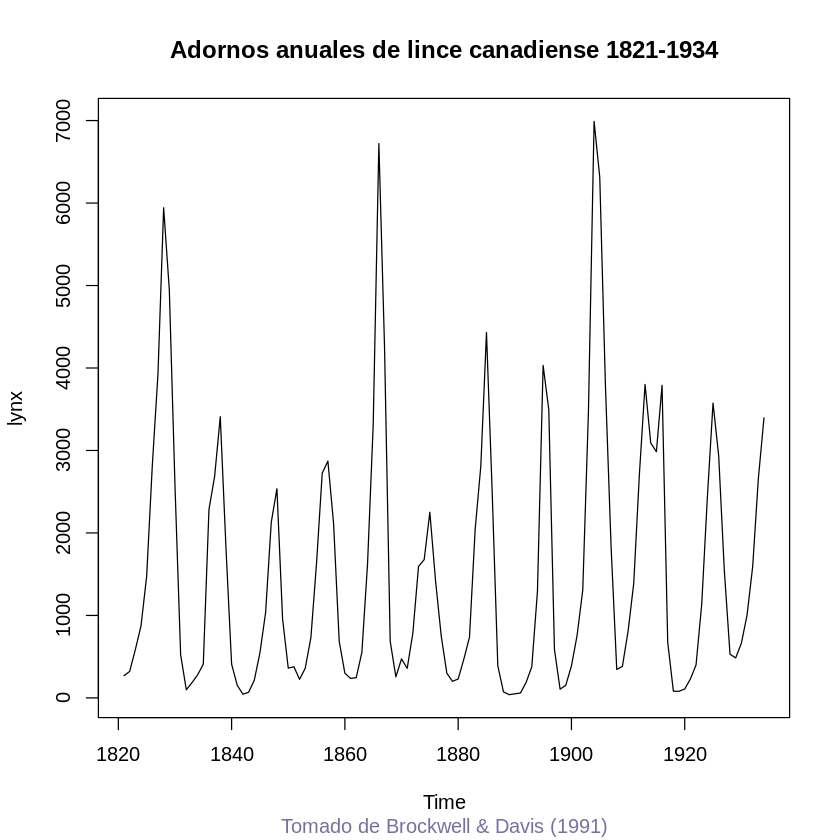

In [7]:
# Gráfica de mi Time Series
plot(lynx)
title( main = "Adornos anuales de lince canadiense 1821-1934", 
       sub = "Tomado de Brockwell & Davis (1991)",
       col.sub = "#78719F")

Podemos comentar de nuestra gráfica que no contamos con una tendencia descartando el supuesto de media, asi como vemos que tenemos una varianza no tan dispersa, asi cumpliendo con los dos supuestos de media y varianza.

Diciendo asi que estamos trabajando con una serie estaciona

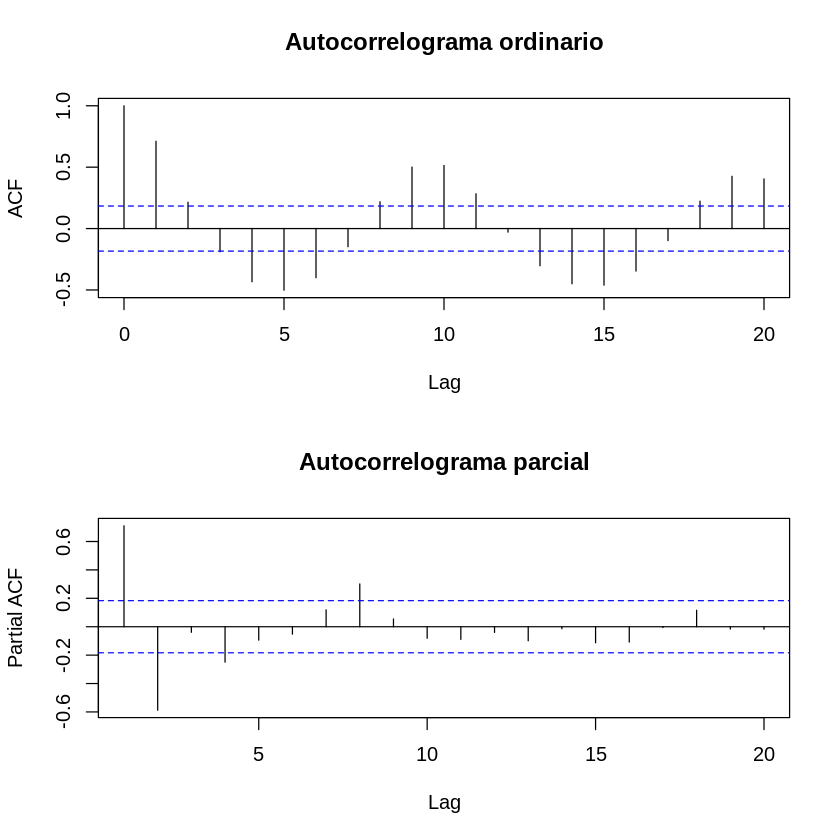

In [8]:
# Correlograma

par(mfrow = c(2,1))
acf(lynx, main = "Autocorrelograma ordinario") #Autocorrelograma ordinario
pacf(lynx, main = "Autocorrelograma parcial") #Autocorrelograma parcial

Observando mi autoccorrelograma, observamos que tiende un comportamiento de *Senos y Cosenos*

Entonces sospechamos de serie con modelo ARMA



1.   **Revisando modelo AR**



In [9]:
ar(lynx) #Modelo autorregresivo


Call:
ar(x = lynx)

Coefficients:
      1        2        3        4        5        6        7        8  
 1.0379  -0.6063   0.1910  -0.1411  -0.0207   0.0199  -0.2046   0.3012  

Order selected 8  sigma^2 estimated as  726897

Se generaron 8 coeficientes entonces decimos que nuestro modelo autoregresivo seria **AR(8)**



Usando la funcion `arima(data, order =c(p,0,0))`

In [10]:
arima(lynx, order =c(8,0,0))


Call:
arima(x = lynx, order = c(8, 0, 0))

Coefficients:
         ar1      ar2     ar3      ar4      ar5     ar6      ar7     ar8
      1.0554  -0.6298  0.2105  -0.1438  -0.0200  0.0373  -0.2342  0.3322
s.e.  0.0880   0.1308  0.1431   0.1430   0.1432  0.1423   0.1299  0.0899
      intercept
       1576.422
s.e.    184.003

sigma^2 estimated as 616995:  log likelihood = -923.22,  aic = 1866.43

Decimos que si nuestro aci es pequeño, es un buen modelo ARMA

En este caso vemos un modelo con un **aic = 1866.43**

2.   **Revisando modelo MA**

Usando la funcion `arima(data, order =c(0,0,q))`

In [11]:
arima(lynx, order =c(0,0,1)) # MA(1)
arima(lynx, order =c(0,0,2)) # MA(2)
arima(lynx, order =c(0,0,3)) # MA(3)


Call:
arima(x = lynx, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.7934  1538.9425
s.e.  0.0430   176.7208

sigma^2 estimated as 1115573:  log likelihood = -955.97,  aic = 1917.95


Call:
arima(x = lynx, order = c(0, 0, 2))

Coefficients:
         ma1     ma2  intercept
      1.1407  0.4697  1545.3670
s.e.  0.0776  0.0721   224.5215

sigma^2 estimated as 855092:  log likelihood = -941.03,  aic = 1890.06


Call:
arima(x = lynx, order = c(0, 0, 3))

Coefficients:
         ma1     ma2     ma3  intercept
      1.1922  0.6806  0.2117  1545.1038
s.e.  0.0879  0.1183  0.1020   259.7964

sigma^2 estimated as 823374:  log likelihood = -938.89,  aic = 1887.77

Vemos que de los 3 modelos MA(q) que realizamos el modelo con mejor desempeño fue el de MA(3) con un aic de 1887.77



3.   **Ciclo modelo AR y MA**



Para no estar checando uno por uno para ver cual tiene mejor desempeño, usamos un ciclo para ver cual AIC es el menor siendo este el que sera el mejor modelo ARMA

In [12]:
# ciclo para encontrar el mejor modelo AR

best.ar <- Inf
orden.ar <- c(0,0,0)
for(i in 1:20)
   { aux.ar <- AIC(arima(lynx, order=c(i,0,0), method="ML"))
    if (best.ar> aux.ar)
       { best.ar <- aux.ar
          best.p <- i
          orden.ar <- c(i,0,0)
      }
   } 
orden.ar

# ciclo para encontrar el mejor modelo MA

best.ma <- Inf
orden.ma <- c(0,0,0)
for(j in 1:20)
   { aux.ma <- AIC(arima(lynx, order=c(0,0,j), method="ML"))
    if (best.ma> aux.ma)
       { best.ma <- aux.ma
          best.q <- j
          orden.ma <- c(0,0,j)
      }
   } 
orden.ma

[1] 8 0 0

[1]  0  0 10

Vemos que nuestros mejores modelos AR y MA son:


*   AR(8)
*   MA(10)

Si comparamos los modelos para ver cual tiene un AIC menor tenemos que...



In [13]:
arima(lynx,orden.ar) # Modelo AR(8)
arima(lynx,orden.ma) # Modelo MA(10)


Call:
arima(x = lynx, order = orden.ar)

Coefficients:
         ar1      ar2     ar3      ar4      ar5     ar6      ar7     ar8
      1.0554  -0.6298  0.2105  -0.1438  -0.0200  0.0373  -0.2342  0.3322
s.e.  0.0880   0.1308  0.1431   0.1430   0.1432  0.1423   0.1299  0.0899
      intercept
       1576.422
s.e.    184.003

sigma^2 estimated as 616995:  log likelihood = -923.22,  aic = 1866.43


Call:
arima(x = lynx, order = orden.ma)

Coefficients:
         ma1     ma2     ma3      ma4      ma5      ma6      ma7      ma8
      1.1197  0.5778  0.1465  -0.1045  -0.2850  -0.3815  -0.5122  -0.3103
s.e.  0.0969  0.1538  0.1637   0.1461   0.1361   0.1484   0.1749   0.2173
        ma9    ma10  intercept
      0.051  0.1977   1536.350
s.e.  0.226  0.1415    120.914

sigma^2 estimated as 683545:  log likelihood = -928.9,  aic = 1881.8

Vemos que el modelo AR tiene un AIC con menor, entonces decimos que el modelo AR tiene mejor desempeño que el modelo MA



4.   **Modelo ARMA**



In [14]:
# ciclo para encontrar el mejor modelo ARMA

best.arma <- Inf
for (i in 0:5)
   {
     for(j in 0:5)
        { aux.arma <- AIC(arima(lynx, order=c(i,0,j), method="ML"))
          if (best.arma > aux.arma)
             { best.arma <- aux.arma 
               best.pq <- c(i,0,j)
             }
        }
  }
best.pq

Warning message in arima(lynx, order = c(i, 0, j), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(lynx, order = c(i, 0, j), method = "ML"):
“possible convergence problem: optim gave code = 1”


[1] 2 0 4

In [15]:
best.arma # AIC de ARMA(2,0,4)

[1] 1858.108

Vemos que si comparamos nuestros modelos AR, MA y ARMA, el mejor modelo es el de ARMA(2,0,4) con un AIC más pequeño mostrando asi un mejor desempeño

Obteniendo las predicciones de mi mejor modelo tenemos que

In [16]:
# Predicciones modelo ARMA(2,0,4)
require(utils)
predict(arima(lynx, order=c(2,0,4), method = "ML"),n.ahead = 5) # Mejor ma

$pred
Time Series:
Start = 1935 
End = 1939 
Frequency = 1 
[1] 2825.40166 1600.25204  542.45029  -11.71057   73.89637

$se
Time Series:
Start = 1935 
End = 1939 
Frequency = 1 
[1]  760.166 1046.833 1075.578 1075.884 1075.657

5.  **Viendo gráficamente las predicciones MA, AR y ARMA**

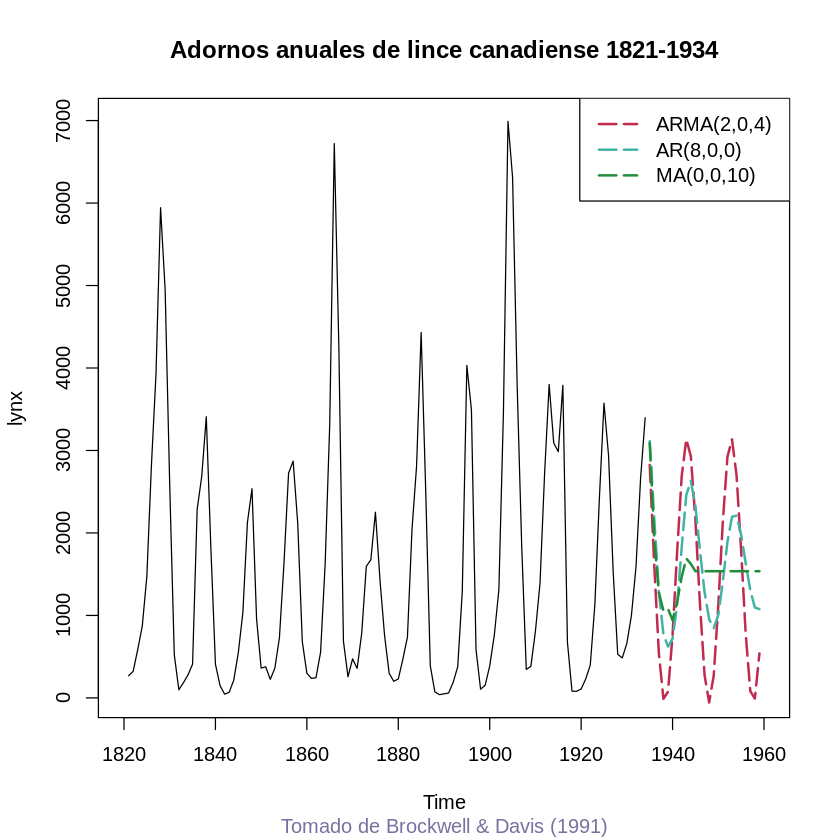

In [29]:
p.arma <- predict(arima(lynx, order=c(2,0,4), method = "ML"),n.ahead = 25)$pred # Predicciones ARMA
p.ar <- predict(arima(lynx, order=c(8,0,0), method = "ML"),n.ahead = 25)$pred # Predicciones AR
p.ma <- predict(arima(lynx, order=c(0,0,10), method = "ML"),n.ahead = 25)$pred # Predicciones MA
plot(lynx, xlim= c(1820,1960)) # Gráfica
title( main = "Adornos anuales de lince canadiense 1821-1934", # Titulo
       sub = "Tomado de Brockwell & Davis (1991)",
       col.sub = "#78719F")
lines(p.arma, col = "#C12B4F", lty = 5, lwd = 2) # Linea ARMA
lines(p.ar, col = "#41B3A5", lty = 5, lwd = 2) # Linea AR
lines(p.ma, col = "#208E39", lty = 5, lwd = 2) # Linea MA
legend("topright", legend = c("ARMA(2,0,4)","AR(8,0,0)","MA(0,0,10)")
        , lty = 5, col = c("#C12B4F","#41B3A5","#208E39"), lwd = 2)

### Data(nottem)